In [1]:
#!pip uninstall numpy --yes
#!pip3 install numpy


In [2]:

#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge folium=0.5.0 --yes


In [3]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# import k-means from clustering stage
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib for plotting
import matplotlib.pyplot as plt

import folium # map rendering library


In [4]:
#using pandas read html to read the data from website
url = 'https://en.wikipedia.org/wiki/EC_postcode_area'
df = pd.read_html(url)[2]
print(df.shape)
df

(28, 4)


,Postcode district,Post town,Coverage,Local authority area(s)
0,EC1A,LONDON,St Bartholomew's Hospital,"City of London, Islington"
1,EC1M,LONDON,"Clerkenwell, Farringdon","Islington, Camden, City of London"
2,EC1N,LONDON,Hatton Garden,"Camden, City of London"
3,EC1P,LONDON,NaN,non-geographic
4,EC1R,LONDON,"Finsbury, Finsbury Estate (west)","Islington, Camden"
5,EC1V,LONDON,"Finsbury (east), Moorfields Eye Hospital","Islington, Hackney"
6,EC1Y,LONDON,"St Luke's, Bunhill Fields","Islington, City of London"
7,EC2A,LONDON,Shoreditch,"Islington, Hackney, City of London"
8,EC2M,LONDON,"Broadgate, Liverpool Street","City of London, Tower Hamlets"
9,EC2N,LONDON,"Old Broad Street, Tower 42",City of London


In [5]:
df1 = df.rename(columns={'Postcode district':'Postal Code', 'Post town':'City', 'Coverage':'District'})

In [6]:
df1 = df1[['Postal Code','City','District']]
df1.dropna(axis=0,inplace=True) #remove any postcode districts without a district name
df1.reset_index(drop=True, inplace=True) #reset index
print(df1.shape)
df1

(23, 3)


,Postal Code,City,District
0,EC1A,LONDON,St Bartholomew's Hospital
1,EC1M,LONDON,"Clerkenwell, Farringdon"
2,EC1N,LONDON,Hatton Garden
3,EC1R,LONDON,"Finsbury, Finsbury Estate (west)"
4,EC1V,LONDON,"Finsbury (east), Moorfields Eye Hospital"
5,EC1Y,LONDON,"St Luke's, Bunhill Fields"
6,EC2A,LONDON,Shoreditch
7,EC2M,LONDON,"Broadgate, Liverpool Street"
8,EC2N,LONDON,"Old Broad Street, Tower 42"
9,EC2R,LONDON,Bank of England


In [7]:
#!pip install geocoder

In [8]:
import geocoder
latitude=[]
longitude=[]
for code in df1['Postal Code']:
    g = geocoder.arcgis('{}, London, United Kingdom'.format(code)) 
    #print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(code))
        #print(code, g.latlng)
    latlng = g.latlng
    latitude.append(latlng[0])
    longitude.append(latlng[1])
    
df1['Latitude'] = latitude
df1['Longitude'] = longitude

In [9]:
df1.head()

,Postal Code,City,District,Latitude,Longitude
0,EC1A,LONDON,St Bartholomew's Hospital,51.516355,-0.099137
1,EC1M,LONDON,"Clerkenwell, Farringdon",51.521011,-0.106675
2,EC1N,LONDON,Hatton Garden,51.520027,-0.110511
3,EC1R,LONDON,"Finsbury, Finsbury Estate (west)",51.522350,-0.110057
4,EC1V,LONDON,"Finsbury (east), Moorfields Eye Hospital",51.525715,-0.101704


In [10]:
from geopy.geocoders import Nominatim 
address = 'City of London, United Kingdom' # assign London as address for map

geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address) # geocode London
latitude = location.latitude
longitude = location.longitude

# create map of London using latitude and longitude values
map_ln = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, district, city in zip(df1['Latitude'], df1['Longitude'], df1['District'], df1['City']):
    label = '{}, {}'.format(district, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ln) 
    
map_ln

#

## Foursquare

### Defining Foursquare credentials for API

In [11]:
CLIENT_ID = 'E5D2Y2UH3EEYLSQPXCA3JDNHKUHEN4ECMJ3RIH1I2R3LCBPH' # Foursquare ID
CLIENT_SECRET = 'WG4URZSL2ZCETJAOPUCJ0T4S5OTLPA4QS5HHRUOIMCED25AV' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: E5D2Y2UH3EEYLSQPXCA3JDNHKUHEN4ECMJ3RIH1I2R3LCBPH
CLIENT_SECRET:WG4URZSL2ZCETJAOPUCJ0T4S5OTLPA4QS5HHRUOIMCED25AV


#### Exploring the first District in the dataset

In [12]:
df1.loc[0, 'District']

"St Bartholomew's Hospital"

In [13]:
dt_latitude = df1.loc[0, 'Latitude'] # district latitude value
dt_longitude = df1.loc[0, 'Longitude'] # district longitude value

dt_name = df1.loc[0, 'District'] # district name

print('Latitude and longitude values of {} are {}, {}.'.format(dt_name, 
                                                               dt_latitude, 
                                                               dt_longitude))

Latitude and longitude values of St Bartholomew's Hospital are 51.51635500000003, -0.09913667499995427.


#### Top 100 venues in St Bartholomew's Hospital within a 500 meter radius

In [14]:
# Create a GET request URL with the credentials

LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, dt_latitude, dt_longitude,VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=E5D2Y2UH3EEYLSQPXCA3JDNHKUHEN4ECMJ3RIH1I2R3LCBPH&client_secret=WG4URZSL2ZCETJAOPUCJ0T4S5OTLPA4QS5HHRUOIMCED25AV&ll=51.51635500000003,-0.09913667499995427&v=20180605&radius=500&limit=100'

In [15]:
# Send the GET request to examine the results

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '603c04c16db72d086a049fe0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'City of London',
  'headerFullLocation': 'City of London, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 102,
  'suggestedBounds': {'ne': {'lat': 51.520855004500035,
    'lng': -0.09191882850804109},
   'sw': {'lat': 51.51185499550003, 'lng': -0.10635452149186744}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4dff32bae4cdf7246077a9aa',
       'name': 'Pilpel',
       'location': {'address': '5 Queens Head Passage',
        'crossStreet': 'Paternoster Sq',
        'lat': 51.51519526381051,
        'lng': -0.09846207739921972,
        'labele

#### Inspecting the returned data in the JSON format to identify the relevant part to transform into a pandas dataframe

In [16]:
# assign relevant part of JSON to venues
venues = results['response']['groups'][0]['items'] #required information is stored in the items section

# tranform venues into a dataframe
nearby_venues = json_normalize(venues)
nearby_venues.head()

<ipython-input-16-0dd09c998e6a>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-4dff32bae4cdf7246077a9aa-0,0,"[{'summary': 'This spot is popular', 'type': '...",4dff32bae4cdf7246077a9aa,Pilpel,5 Queens Head Passage,Paternoster Sq,51.515195,-0.098462,"[{'label': 'display', 'lat': 51.51519526381051...",137,EC4M 7DZ,GB,London,Greater London,United Kingdom,"[5 Queens Head Passage (Paternoster Sq), Londo...","[{'id': '4bf58dd8d48988d10b941735', 'name': 'F...",0,[],NaN,NaN
1,e-0-4fc31eede4b05b8503be268b-1,0,"[{'summary': 'This spot is popular', 'type': '...",4fc31eede4b05b8503be268b,Virgin Active,200 Aldersgate Street,NaN,51.518047,-0.097661,"[{'label': 'display', 'lat': 51.5180472, 'lng'...",214,EC1A 4HD,GB,London,Greater London,United Kingdom,"[200 Aldersgate Street, London, Greater London...","[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",0,[],351618652,NaN
2,e-0-4ad3be62f964a52012e620e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4ad3be62f964a52012e620e3,Postman's Park,Edward St,NaN,51.516860,-0.097643,"[{'label': 'display', 'lat': 51.51685979391399...",117,EC1A 7BX,GB,London,Greater London,United Kingdom,"[Edward St, London, Greater London, EC1A 7BX, ...","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN
3,e-0-4c56b2a912f0d13a675605ad-3,0,"[{'summary': 'This spot is popular', 'type': '...",4c56b2a912f0d13a675605ad,Christ Church Greyfriars Garden,King Edward St,NaN,51.515670,-0.098760,"[{'label': 'display', 'lat': 51.51566979481579...",80,EC1,GB,London,Greater London,United Kingdom,"[King Edward St, London, Greater London, EC1, ...","[{'id': '4bf58dd8d48988d15a941735', 'name': 'G...",0,[],NaN,NaN
4,e-0-4ad4f4c0f964a520e70021e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4ad4f4c0f964a520e70021e3,St Bartholomew the Great (St Bartholomew-the-G...,6 Kinghorn St,at Cloth Fair,51.518631,-0.099890,"[{'label': 'display', 'lat': 51.51863075215108...",258,EC1A 7HW,GB,London,Greater London,United Kingdom,"[6 Kinghorn St (at Cloth Fair), London, Greate...","[{'id': '4bf58dd8d48988d132941735', 'name': 'C...",0,[],NaN,NaN


In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Pilpel,Falafel Restaurant,51.515195,-0.098462
1,Virgin Active,Gym / Fitness Center,51.518047,-0.097661
2,Postman's Park,Park,51.516860,-0.097643
3,Christ Church Greyfriars Garden,Garden,51.515670,-0.098760
4,St Bartholomew the Great (St Bartholomew-the-G...,Church,51.518631,-0.099890
5,Paternoster Square,Plaza,51.514572,-0.099226
6,Stationers' Hall,Event Space,51.514292,-0.101487
7,Museum of London,History Museum,51.518019,-0.096060
8,One New Change Rooftop,Roof Deck,51.513912,-0.095775
9,Oriole,Bar,51.518904,-0.102672


In [19]:
# number of venues returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [20]:
print (nearby_venues['categories'].value_counts()[0:15])

Coffee Shop                   9
Italian Restaurant            6
Gym / Fitness Center          4
Clothing Store                4
Sandwich Place                3
Asian Restaurant              3
Modern European Restaurant    3
Wine Bar                      3
Pub                           3
Scenic Lookout                3
French Restaurant             3
Burger Joint                  3
Grocery Store                 2
Pizza Place                   2
English Restaurant            2
Name: categories, dtype: int64


# 

## Exploring Postal Areas in Central London

In [21]:
# Creating a function that repeats the same process as above for all Areas in Central London

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    #create a set of names and co-ordinates 
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
# code using the above function to create a new dataframe 
CL_venues = getNearbyVenues(names=df1['District'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Longitude']
                           )

In [23]:
print(CL_venues.shape)
CL_venues.head(10)

(1720, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St Bartholomew's Hospital,51.516355,-0.099137,Pilpel,51.515195,-0.098462,Falafel Restaurant
1,St Bartholomew's Hospital,51.516355,-0.099137,Virgin Active,51.518047,-0.097661,Gym / Fitness Center
2,St Bartholomew's Hospital,51.516355,-0.099137,Postman's Park,51.516860,-0.097643,Park
3,St Bartholomew's Hospital,51.516355,-0.099137,Christ Church Greyfriars Garden,51.515670,-0.098760,Garden
4,St Bartholomew's Hospital,51.516355,-0.099137,St Bartholomew the Great (St Bartholomew-the-G...,51.518631,-0.099890,Church
5,St Bartholomew's Hospital,51.516355,-0.099137,Paternoster Square,51.514572,-0.099226,Plaza
6,St Bartholomew's Hospital,51.516355,-0.099137,Stationers' Hall,51.514292,-0.101487,Event Space
7,St Bartholomew's Hospital,51.516355,-0.099137,Museum of London,51.518019,-0.096060,History Museum
8,St Bartholomew's Hospital,51.516355,-0.099137,One New Change Rooftop,51.513912,-0.095775,Roof Deck
9,St Bartholomew's Hospital,51.516355,-0.099137,Oriole,51.518904,-0.102672,Bar


In [24]:
# Create a dataframe to concentrate only on Restaurants 
CL_venues_only_restaurant = CL_venues[CL_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
CL_venues_only_restaurant.index = np.arange(1, len(CL_venues_only_restaurant )+1)

In [25]:
print (CL_venues_only_restaurant['Venue Category'].value_counts())

Italian Restaurant               69
Restaurant                       40
French Restaurant                36
Vietnamese Restaurant            34
Asian Restaurant                 26
Sushi Restaurant                 24
Japanese Restaurant              23
Turkish Restaurant               19
Indian Restaurant                18
Falafel Restaurant               16
Seafood Restaurant               14
Modern European Restaurant       14
English Restaurant               12
Middle Eastern Restaurant        11
South American Restaurant        10
Argentinian Restaurant            8
Portuguese Restaurant             7
Fast Food Restaurant              6
Tapas Restaurant                  5
German Restaurant                 5
Korean Restaurant                 5
Scandinavian Restaurant           4
Latin American Restaurant         4
Spanish Restaurant                4
New American Restaurant           4
Mediterranean Restaurant          4
Mexican Restaurant                3
Dim Sum Restaurant          

In [26]:
print('There are {} unique categories.'.format(len(CL_venues_only_restaurant['Venue Category'].unique())))

There are 42 unique categories.


In [27]:
CL_venues_only_restaurant.shape

(457, 7)

In [28]:
# create a dataframe of top 10 categories
CL_venues_Top10 = CL_venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
CL_venues_Top10 = CL_venues_Top10.reset_index()
CL_venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
CL_venues_Top10

,Venue_Category,Frequency
0,Italian Restaurant,69
1,Restaurant,40
2,French Restaurant,36
3,Vietnamese Restaurant,34
4,Asian Restaurant,26
5,Sushi Restaurant,24
6,Japanese Restaurant,23
7,Turkish Restaurant,19
8,Indian Restaurant,18
9,Falafel Restaurant,16


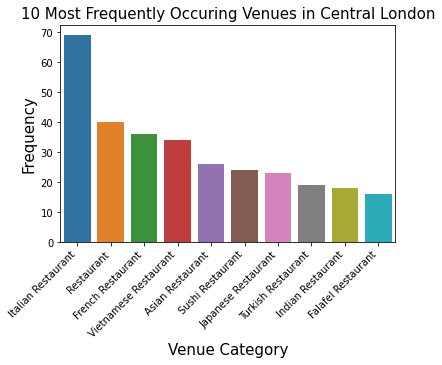

<Figure size 1296x504 with 0 Axes>

In [29]:
import seaborn as sns

s=sns.barplot(x="Venue_Category", y="Frequency", data=CL_venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in Central London', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [30]:
#Removing venue categories which only have the label as Restaurant
indexNames = CL_venues_only_restaurant[CL_venues_only_restaurant['Venue Category'] == 'Restaurant'].index

CL_venues_only_restaurant.drop(indexNames, inplace=True)

'''#Removing venue Italian Restaurants from the categores as it significantly outweighs other restaurants.
indexNames2 = CL_venues_only_restaurant[CL_venues_only_restaurant['Venue Category'] == 'Italian Restaurant'].index

CL_venues_only_restaurant.drop(indexNames2, inplace=True)'''

"#Removing venue Italian Restaurants from the categores as it significantly outweighs other restaurants.\nindexNames2 = CL_venues_only_restaurant[CL_venues_only_restaurant['Venue Category'] == 'Italian Restaurant'].index\n\nCL_venues_only_restaurant.drop(indexNames2, inplace=True)"

In [31]:
CL_venues_only_restaurant.head(50)

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,St Bartholomew's Hospital,51.516355,-0.099137,Pilpel,51.515195,-0.098462,Falafel Restaurant
2,St Bartholomew's Hospital,51.516355,-0.099137,Club Gascon,51.518541,-0.100462,French Restaurant
3,St Bartholomew's Hospital,51.516355,-0.099137,Ask For Janice,51.519128,-0.100374,Modern European Restaurant
4,St Bartholomew's Hospital,51.516355,-0.099137,Falafel,51.513237,-0.101473,Falafel Restaurant
5,St Bartholomew's Hospital,51.516355,-0.099137,Coco di Mama,51.514903,-0.098512,Italian Restaurant
6,St Bartholomew's Hospital,51.516355,-0.099137,itsu,51.514835,-0.097468,Sushi Restaurant
7,St Bartholomew's Hospital,51.516355,-0.099137,Assenheims 56,51.513507,-0.102752,South American Restaurant
8,St Bartholomew's Hospital,51.516355,-0.099137,Vita Mojo,51.513058,-0.100115,Modern European Restaurant
9,St Bartholomew's Hospital,51.516355,-0.099137,Mangio,51.512524,-0.098292,Italian Restaurant
10,St Bartholomew's Hospital,51.516355,-0.099137,eatviet,51.517820,-0.105105,Vietnamese Restaurant


In [32]:
CL_venues_restaurant = CL_venues_only_restaurant.groupby(['District'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [33]:
CL_venues_restaurant

District
Bank of England                                 22
Barbican                                        10
Blackfriars                                     10
Broadgate, Liverpool Street                     29
Cannon Street                                    5
Clerkenwell, Farringdon                         13
Cornhill, Gracechurch Street, Lombard Street    13
Fetter Lane                                     18
Finsbury (east), Moorfields Eye Hospital        18
Finsbury, Finsbury Estate (west)                20
Guildhall                                       28
Hatton Garden                                   13
Lloyd's of London, Fenchurch Street              5
Mansion House                                   19
Monument, Billingsgate                          14
Old Broad Street, Tower 42                      26
Shoreditch                                      17
St Bartholomew's Hospital                       34
St Luke's, Bunhill Fields                       20
St Mary Axe, Aldgate  

In [34]:
CL_venues_restaurant_df  = CL_venues_restaurant.to_frame().reset_index()
CL_venues_restaurant_df.columns = ['District', 'Number of Restaurants']
CL_venues_restaurant_df.index = np.arange(1, len(CL_venues_restaurant_df)+1)
list_rest_no = CL_venues_restaurant_df['Number of Restaurants'].to_list()
list_dist = CL_venues_restaurant_df['District'].to_list()

In [35]:
CL_venues_restaurant_df.head()

,District,Number of Restaurants
1,Bank of England,22
2,Barbican,10
3,Blackfriars,10
4,"Broadgate, Liverpool Street",29
5,Cannon Street,5


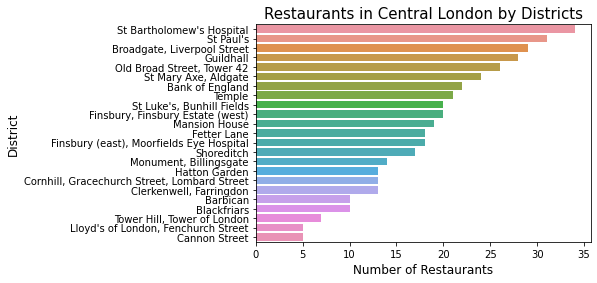

<Figure size 1440x864 with 0 Axes>

In [36]:
CL_venues_restaurant_df = CL_venues_restaurant_df.sort_values(by=['Number of Restaurants'],ascending=False)

s=sns.barplot(x="Number of Restaurants", y="District", data=CL_venues_restaurant_df)
#s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Restaurants in Central London by Districts', fontsize=15)
plt.xlabel("Number of Restaurants", fontsize=12)
plt.ylabel ("District", fontsize=12)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(20,12))
plt.show()

# 

## Analysing each District

In [37]:
# one hot encoding to convert the categorical values to binary vectors for machine learning
CL_onehot = pd.get_dummies(CL_venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
CL_onehot['District'] = CL_venues_only_restaurant['District'] 

# move distrct column to the first column
fixed_columns = [CL_onehot.columns[-1]] + list(CL_onehot.columns[:-1])
CL_onehot = CL_onehot[fixed_columns]

CL_onehot.head()

,District,Argentinian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,St Bartholomew's Hospital,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,St Bartholomew's Hospital,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,St Bartholomew's Hospital,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,St Bartholomew's Hospital,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,St Bartholomew's Hospital,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
CL_onehot.shape

(417, 42)

In [39]:
# Grouping rows by districts by means of the frequency

CL_grouped = CL_onehot.groupby('District').mean().reset_index()
CL_grouped

,District,Argentinian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Bank of England,0.000000,0.090909,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.090909,0.045455,0.00,0.090909,0.181818,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.045455,0.090909,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.045455,0.045455,0.000000,0.045455
1,Barbican,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.00,0.100000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.100000
2,Blackfriars,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.00,0.000000,0.300000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000
3,"Broadgate, Liverpool Street",0.034483,0.034483,0.034483,0.034483,0.000000,0.000000,0.068966,0.034483,0.000000,0.068966,0.034483,0.00,0.103448,0.103448,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000,0.103448,0.034483,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.034483,0.000000,0.068966,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Cannon Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.20,0.000000,0.400000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
5,"Clerkenwell, Farringdon",0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.076923,0.000000,0.00,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769
6,"Cornhill, Gracechurch Street, Lombard Street",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.153846,0.000000,0.00,0.076923,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.076923,0.000000,0.153846,0.000000,0.000000,0.000000
7,Fetter Lane,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.055556,0.222222,0.000000,0.00,0.055556,0.277778,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.055556
8,"Finsbury (east), Moorfields Eye Hospital",0.000000,0.0000

In [40]:
CL_grouped.shape

(23, 42)

# 


### Top 5 venues in each district

In [41]:
num_top_venues = 5

for dist in CL_grouped['District']:
    print("----"+dist+"----")
    temp = CL_grouped[CL_grouped['District'] == dist].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bank of England----
                venue  freq
0  Italian Restaurant  0.18
1   Indian Restaurant  0.09
2   French Restaurant  0.09
3    Asian Restaurant  0.09
4  Seafood Restaurant  0.09


----Barbican----
                           venue  freq
0             Italian Restaurant   0.3
1          Vietnamese Restaurant   0.1
2  Vegetarian / Vegan Restaurant   0.1
3               Asian Restaurant   0.1
4             Turkish Restaurant   0.1


----Blackfriars----
                        venue  freq
0          Italian Restaurant   0.3
1  Modern European Restaurant   0.2
2           French Restaurant   0.1
3         Japanese Restaurant   0.1
4          Seafood Restaurant   0.1


----Broadgate, Liverpool Street----
                      venue  freq
0  Mediterranean Restaurant  0.10
1        Italian Restaurant  0.10
2         Indian Restaurant  0.10
3          Sushi Restaurant  0.07
4        English Restaurant  0.07


----Cannon Street----
                   venue  freq
0     Italian Restau

## 

### Transforming the top venues table into a pandas dataframe

In [42]:
# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
# Create dataframe of top 10 venues in each district
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
dist_venues_sorted = pd.DataFrame(columns=columns)
dist_venues_sorted['District'] = CL_grouped['District']

for ind in np.arange(CL_grouped.shape[0]): # for each of the 23 columns
    dist_venues_sorted.iloc[ind, 1:] = return_most_common_venues(CL_grouped.iloc[ind, :], num_top_venues)

dist_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bank of England,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Asian Restaurant,Indian Restaurant,French Restaurant,Vietnamese Restaurant,German Restaurant,New American Restaurant,Scandinavian Restaurant
1,Barbican,Italian Restaurant,Vietnamese Restaurant,German Restaurant,Asian Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Indian Restaurant,Korean Restaurant,Kebab Restaurant
2,Blackfriars,Italian Restaurant,Modern European Restaurant,Vietnamese Restaurant,French Restaurant,Turkish Restaurant,Japanese Restaurant,Seafood Restaurant,Korean Restaurant,Kebab Restaurant,Indian Restaurant
3,"Broadgate, Liverpool Street",Mediterranean Restaurant,Indian Restaurant,Italian Restaurant,Middle Eastern Restaurant,English Restaurant,Sushi Restaurant,French Restaurant,Japanese Restaurant,Asian Restaurant,Cantonese Restaurant
4,Cannon Street,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Greek Restaurant,Malay Restaurant,Latin American Restaurant,Korean Restaurant,Kebab Restaurant,Indian Restaurant,German Restaurant


# 

## Clustering Districts

### Using _k_-means to cluster the Districts

#### Determining the best _k_-value using the elbow method

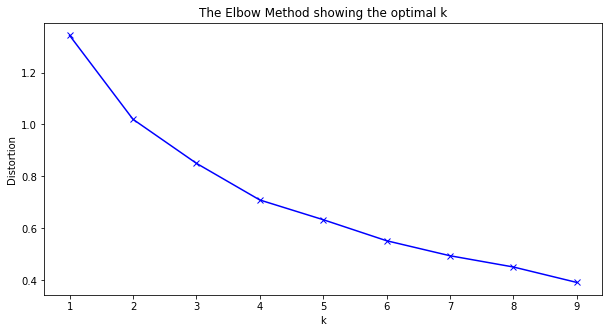

In [44]:
CL_clustering = CL_grouped.drop('District', 1)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(CL_clustering)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Running the k-means clustering

In [45]:
# using 5 clusters
kclusters = 5

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(CL_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 1, 1, 2, 0, 4, 1, 2, 0])

Create a new dataframe that includes the cluster with the top 10 venues in each district

In [46]:
# add clustering labels
dist_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df1 = df1.drop(['Postal Code','City'],axis=1)

CL_merged = df1

# merge CL_grouped with df1 to add latitude/longitude for each district
CL_merged = CL_merged.join(dist_venues_sorted.set_index('District'), on='District')

In [47]:
CL_merged

,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St Bartholomew's Hospital,51.516355,-0.099137,1,Italian Restaurant,Asian Restaurant,Modern European Restaurant,French Restaurant,Vietnamese Restaurant,Falafel Restaurant,Japanese Restaurant,English Restaurant,Sushi Restaurant,South American Restaurant
1,"Clerkenwell, Farringdon",51.521011,-0.106675,0,Vietnamese Restaurant,Asian Restaurant,Italian Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Spanish Restaurant,English Restaurant,Falafel Restaurant,Modern European Restaurant,French Restaurant
2,Hatton Garden,51.520027,-0.110511,0,Vietnamese Restaurant,Sushi Restaurant,Spanish Restaurant,Korean Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,French Restaurant,Falafel Restaurant,Lebanese Restaurant,Cuban Restaurant
3,"Finsbury, Finsbury Estate (west)",51.522350,-0.110057,0,Sushi Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Spanish Restaurant,Portuguese Restaurant,Lebanese Restaurant,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Greek Restaurant
4,"Finsbury (east), Moorfields Eye Hospital",51.525715,-0.101704,2,Italian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Japanese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Seafood Restaurant,German Restaurant,Kebab Restaurant
5,"St Luke's, Bunhill Fields",51.525630,-0.086289,2,Italian Restaurant,Vietnamese Restaurant,Turkish Restaurant,Japanese Restaurant,Ramen Restaurant,Scandinavian Restaurant,Asian Restaurant,Korean Restaurant,Middle Eastern Restaurant,Peruvian Restaurant
6,Shoreditch,51.524365,-0.078885,2,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Peruvian Restaurant,Kebab Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Indian Restaurant,New American Restaurant,Korean Restaurant
7,"Broadgate, Liverpool Street",51.516950,-0.083340,1,Mediterranean Restaurant,Indian Restaurant,Italian Restaurant,Middle Eastern Restaurant,English Restaurant,Sushi Restaurant,French Restaurant,Japanese Restaurant,Asian Restaurant,Cantonese Restaurant
8,"Old Broad Street, Tower 42",51.515305,-0.083495,1,Turkish Restaurant,Italian Restaurant,Indian Restaurant,Sushi Restaurant,French Restaurant,English Restaurant,Argentinian Restaurant,Portuguese Restaurant,Latin American Restaurant,Malay Restaurant
9,Bank of England,51.516675,-0.089874,1,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Asian Restaurant,Indian Restaurant,French Restaurant,Vietnamese Restaurant,German Restaurant,New American Restaurant,Scandinavian Restaurant


In [48]:
CL_merged.shape

(23, 14)

Visualising the resulting clusters

In [49]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14, tiles="stamenterrain")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(CL_merged['Latitude'], CL_merged['Longitude'], CL_merged['District'], CL_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 

# Examining Clusters

Before examining the clusters, it is worth taking note that Italian Restaurants were signficantly outweighing all other restaurant types in Central London with 24% of the labelled restaurants being Italian.

### Cluster 1

In [50]:
CL_merged.loc[CL_merged['Cluster Labels'] == 0, CL_merged.columns[[0] + list(range(4, CL_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Clerkenwell, Farringdon",Vietnamese Restaurant,Asian Restaurant,Italian Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Spanish Restaurant,English Restaurant,Falafel Restaurant,Modern European Restaurant,French Restaurant
2,Hatton Garden,Vietnamese Restaurant,Sushi Restaurant,Spanish Restaurant,Korean Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,French Restaurant,Falafel Restaurant,Lebanese Restaurant,Cuban Restaurant
3,"Finsbury, Finsbury Estate (west)",Sushi Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Spanish Restaurant,Portuguese Restaurant,Lebanese Restaurant,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Greek Restaurant


#### Italian and Thai cuisine dominant cluster

### Cluster 2

In [51]:
CL_merged.loc[CL_merged['Cluster Labels'] == 1, CL_merged.columns[[0] + list(range(4, CL_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St Bartholomew's Hospital,Italian Restaurant,Asian Restaurant,Modern European Restaurant,French Restaurant,Vietnamese Restaurant,Falafel Restaurant,Japanese Restaurant,English Restaurant,Sushi Restaurant,South American Restaurant
7,"Broadgate, Liverpool Street",Mediterranean Restaurant,Indian Restaurant,Italian Restaurant,Middle Eastern Restaurant,English Restaurant,Sushi Restaurant,French Restaurant,Japanese Restaurant,Asian Restaurant,Cantonese Restaurant
8,"Old Broad Street, Tower 42",Turkish Restaurant,Italian Restaurant,Indian Restaurant,Sushi Restaurant,French Restaurant,English Restaurant,Argentinian Restaurant,Portuguese Restaurant,Latin American Restaurant,Malay Restaurant
9,Bank of England,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Asian Restaurant,Indian Restaurant,French Restaurant,Vietnamese Restaurant,German Restaurant,New American Restaurant,Scandinavian Restaurant
10,Guildhall,Vietnamese Restaurant,French Restaurant,Asian Restaurant,Italian Restaurant,Seafood Restaurant,Indian Restaurant,Modern European Restaurant,Sushi Restaurant,Japanese Restaurant,German Restaurant
12,"St Mary Axe, Aldgate",Argentinian Restaurant,Asian Restaurant,Turkish Restaurant,English Restaurant,French Restaurant,South American Restaurant,Italian Restaurant,Portuguese Restaurant,Cantonese Restaurant,Falafel Restaurant
17,Fetter Lane,Italian Restaurant,French Restaurant,Sushi Restaurant,Vietnamese Restaurant,Japanese Restaurant,Falafel Restaurant,Fast Food Restaurant,Indian Restaurant,Argentinian Restaurant,Turkish Restaurant
18,St Paul's,Italian Restaurant,Vietnamese Restaurant,Asian Restaurant,French Restaurant,Modern European Restaurant,Japanese Restaurant,Seafood Restaurant,Falafel Restaurant,Chinese Restaurant,Sushi Restaurant
19,Mansion House,Vietnamese Restaurant,Italian Restaurant,Sushi Restaurant,French Restaurant,Asian Restaurant,Turkish Restaurant,Japanese Restaurant,Dim Sum Restaurant,English Restaurant,Seafood Restaurant
21,Blackfriars,Italian Restaurant,Modern European Restaurant,Vietnamese Restaurant,French Restaurant,Turkish Restaurant,Japanese Restaurant,Seafood Restaurant,Korean Restaurant,Kebab Restaurant,Indian Restaurant


#### Thai and Middle Eastern 

### Cluster 3

In [52]:
CL_merged.loc[CL_merged['Cluster Labels'] == 2, CL_merged.columns[[0] + list(range(4, CL_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Finsbury (east), Moorfields Eye Hospital",Italian Restaurant,Vietnamese Restaurant,Sushi Restaurant,Japanese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Seafood Restaurant,German Restaurant,Kebab Restaurant
5,"St Luke's, Bunhill Fields",Italian Restaurant,Vietnamese Restaurant,Turkish Restaurant,Japanese Restaurant,Ramen Restaurant,Scandinavian Restaurant,Asian Restaurant,Korean Restaurant,Middle Eastern Restaurant,Peruvian Restaurant
6,Shoreditch,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Peruvian Restaurant,Kebab Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Indian Restaurant,New American Restaurant,Korean Restaurant
11,Barbican,Italian Restaurant,Vietnamese Restaurant,German Restaurant,Asian Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Indian Restaurant,Korean Restaurant,Kebab Restaurant
20,Cannon Street,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Greek Restaurant,Malay Restaurant,Latin American Restaurant,Korean Restaurant,Kebab Restaurant,Indian Restaurant,German Restaurant


#### Diverse cuisine cluster

### Cluster 4

In [53]:
CL_merged.loc[CL_merged['Cluster Labels'] == 3, CL_merged.columns[[0] + list(range(4, CL_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"Lloyd's of London, Fenchurch Street",French Restaurant,Asian Restaurant,Turkish Restaurant,Japanese Restaurant,South American Restaurant,Vietnamese Restaurant,Korean Restaurant,Kebab Restaurant,Italian Restaurant,Indian Restaurant


#### French, Asian and Turkish cuisine dominant cluster

### Cluster 5

In [54]:
CL_merged.loc[CL_merged['Cluster Labels'] == 4, CL_merged.columns[[0] + list(range(4, CL_merged.shape[1]))]]

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,"Tower Hill, Tower of London",Argentinian Restaurant,French Restaurant,Asian Restaurant,Turkish Restaurant,Tapas Restaurant,Italian Restaurant,South American Restaurant,Korean Restaurant,Kebab Restaurant,Japanese Restaurant
15,"Monument, Billingsgate",French Restaurant,Falafel Restaurant,Argentinian Restaurant,Asian Restaurant,Turkish Restaurant,Italian Restaurant,English Restaurant,South American Restaurant,Indian Restaurant,Portuguese Restaurant
16,"Cornhill, Gracechurch Street, Lombard Street",Turkish Restaurant,Italian Restaurant,French Restaurant,Latin American Restaurant,Tapas Restaurant,Japanese Restaurant,Indian Restaurant,South American Restaurant,English Restaurant,Fast Food Restaurant


#### Italian and diverse cuisine cluster